In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import palettable.colorbrewer.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.stats import lognorm
from gaussian_lorentz_fitting import _1peak_fit_PL, _2peak_fit_PL2, _1gauss, _2gauss

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
cmap = palette.mpl_colormap
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


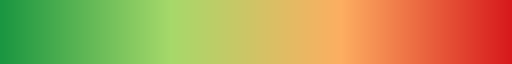

In [4]:
cmap

In [5]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA'
subfolder = glob.glob(cwd + '/quinine_2E-4M**Abs**')
subfolder.sort()
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA/quinine_2E-4M_100ms_Abs_20230223-185642_fd7a955a.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA/quinine_2E-4M_200ms_Abs_20230223-185346_511cd62e.csv


In [6]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['quinine_2E-4M in sapphire']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = ['100ms', '200ms']
         # 'ZnI2 128 uL/min']

quinine_2E-4M_100ms_Abs_20230223-185642_fd7a955a.csv
quinine_2E-4M_200ms_Abs_20230223-185346_511cd62e.csv


In [7]:
## Reading dark and reference
dark = glob.glob(cwd + '/Dark**.csv')
dark.sort()
ref = glob.glob(cwd + '/H2SO4**.csv')
ref.sort()

# dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
# ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [8]:
dark

['/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA/Dark_100ms_Abs_20230223-181755_bf52d5b7.csv',
 '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA/Dark_200ms_Abs_20230223-181659_8e99eeb8.csv']

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


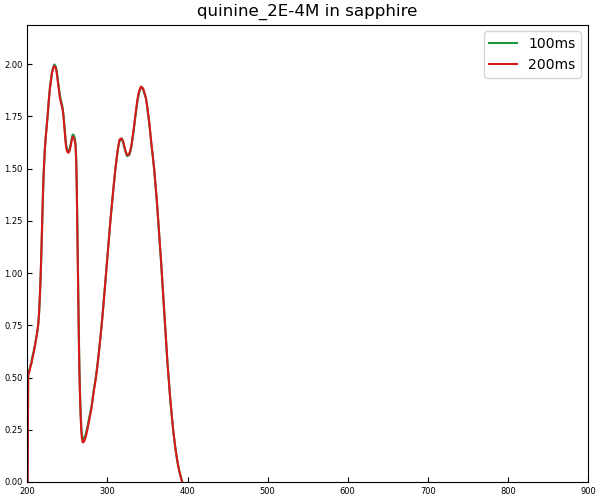

In [9]:
## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(1, 1, figsize = (6, 5), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 0
w2 = 800

ax1.set_title(title[0], fontsize=12)
for i in range(len(subfolder)):
# for i in range(1):
    data_files = subfolder[i]
    # data_files = glob.glob(subfolder[i])
    # data_files.sort()
    # del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = 1 #len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    # ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    # ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    skiprows=5
    
    dark_df = pd.read_csv(dark[i], skiprows=skiprows, sep=',')
    ref_df = pd.read_csv(ref[i], skiprows=skiprows, sep=',')
    df_i = pd.read_csv(data_files, skiprows=skiprows, sep=',')
    
    absorbance = -np.log10((df_i.Sample-dark_df.Sample)/(ref_df.Sample-dark_df.Sample))
    # print(f'i={i}', cmap(color_idx[i-k1]))
    
    ax1.plot(df_i.Energy, absorbance, color=cmap(color_idx[i-k1]), label=label[i])
    ax1.set_xlim(200, 900)
    ax1.set_ylim(0, max(absorbance[w1:w2])+0.2)
    ax1.tick_params(axis='both', direction='in', labelsize=6)

    df[f'Absorbance_{label[i]}'] = absorbance
        
    ## Insert Annotation
    '''
    at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
    at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
    ax1[i].add_artist(at)
    '''
        

df['Wavelength'] = df_i.Energy
ax1.legend()

In [10]:
df[210:215]

Absorbance_100ms  Absorbance_200ms  Wavelength
210          1.181385          1.185214  364.721267
211          1.136948          1.140407  365.509089
212          1.088302          1.095023  366.296840
213          1.040064          1.048248  367.084519
214          0.992134          0.999423  367.872128

In [11]:
df

Absorbance_100ms  Absorbance_200ms  Wavelength
0            -0.161433         -0.085222  197.742294
1            -0.159207         -0.071868  198.544478
2            -0.140179         -0.101042  199.346597
3            -0.141062         -0.089153  200.148650
4             0.514849          0.517527  200.950637
...                ...               ...         ...
1039         -0.063476         -0.065724  990.769837
1040         -0.085839         -0.074560  991.489165
1041         -0.124189         -0.084582  992.208398
1042         -0.000000               NaN  992.927537
1043               NaN         -0.329392  993.646582

[1044 rows x 3 columns]

In [12]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA'
subfolder = glob.glob(cwd + '/quinine_2E-4M**PL**')
subfolder.sort()
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA/quinine_2E-4M_100ms_PL_20230223-185735_2785332b.csv
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230223_quinine_tolOA/quinine_2E-4M_200ms_PL_20230223-185459_94115edc.csv


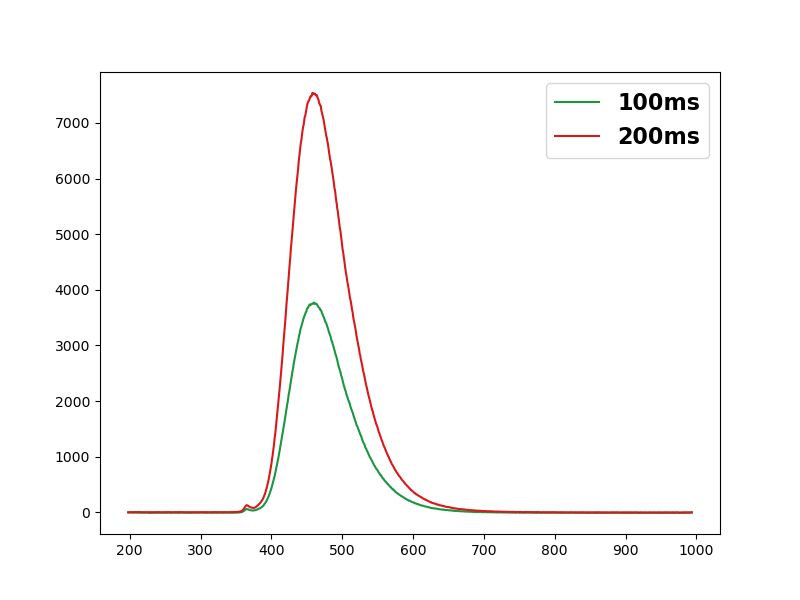

In [13]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (8, 6))
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

df2 = pd.DataFrame()
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
skiprows = 5
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    df_f = pd.read_csv(subfolder[i], skiprows=skiprows, sep=',')
    fluorescence = df_f.Sample-dark_df.Sample
    ax2.plot(df_i.Energy, fluorescence, color=cmap(color_idx[i]), label=label[i])
    df2[f'Fluorescence_{label[i]}'] = fluorescence 

df2['Wavelength'] = df_f.Energy
legend_properties = {'weight':'bold', 'size':16}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

In [14]:
df2

Fluorescence_100ms  Fluorescence_200ms  Wavelength
0               0.597222            1.194444  197.742294
1              -0.180556           -0.805556  198.544478
2              -0.402778            0.638889  199.346597
3               1.819444            1.416667  200.148650
4              -2.847222            4.083333  200.950637
...                  ...                 ...         ...
1039           -6.069444           -2.138889  990.769837
1040           -1.069444           -1.694444  991.489165
1041            0.152778           -1.694444  992.208398
1042           -0.513889            1.194444  992.927537
1043           -0.402778           -0.250000  993.646582

[1044 rows x 3 columns]

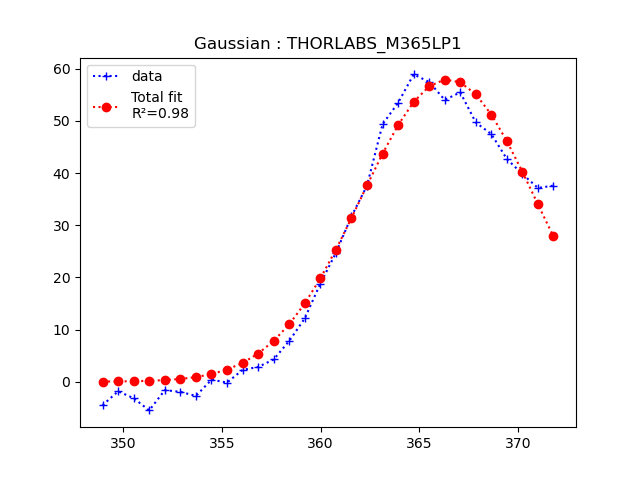

(array([ 57.99228916, 366.46227862,   4.41353549]), 0.9755190153209531)

In [15]:
w1 = 190
w2 = 220
i = 0
x = df2[w1:w2].Wavelength
y = getattr(df2[w1:w2], f'Fluorescence_{label[i]}')
_1peak_fit_PL(x, y, plot=True, distr='G', plot_title='THORLABS_M365LP1')

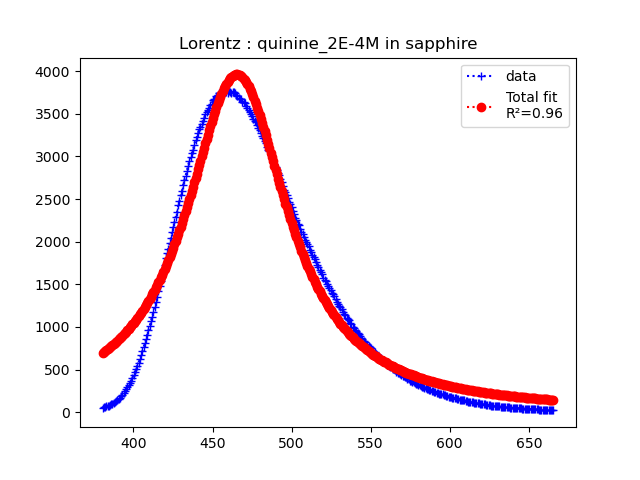

(array([3960.87612722,  465.28389904,   39.12883242]), 0.9577591420199395)

In [16]:
w1 = 230
w2 = 600
i = 0
x = df[w1:w2].Wavelength
y = getattr(df2[w1:w2], f'Fluorescence_{label[i]}')
_1peak_fit_PL(x, y, plot=True, distr='L', plot_title=os.path.basename(title[i]))

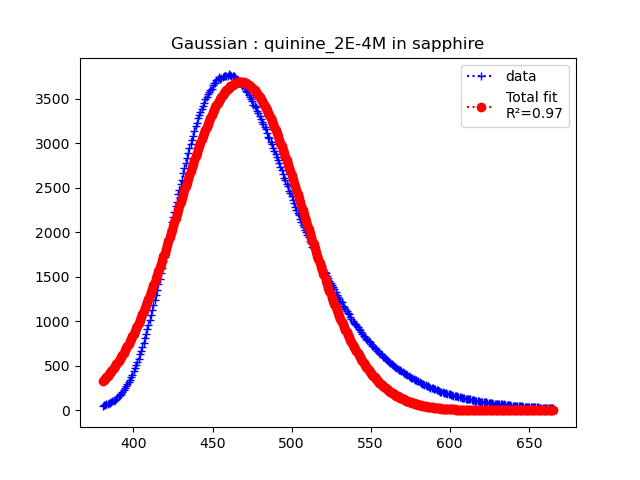

(array([3685.43290565,  467.6204939 ,   39.58250791]), 0.9682973750039813)

In [17]:
_1peak_fit_PL(x, y, plot=True, distr='G', plot_title=os.path.basename(title[i]))

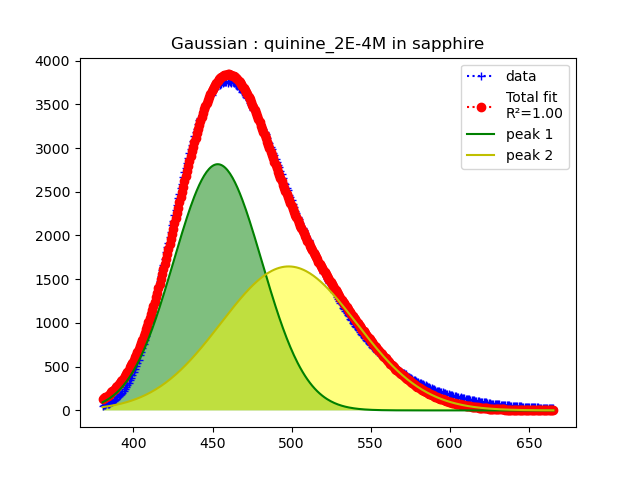

In [18]:
w1 = 230
w2 = 600
i = 0
x = np.array(df[w1:w2].Wavelength)
y = np.array(getattr(df2[w1:w2], f'Fluorescence_{label[i]}'))
#_2peak_fit_PL(x,y, distr='L', height=1000, second_peak=-.4, plot=True, plot_title=os.path.basename(subfolder[i]))
popt, _ = _2peak_fit_PL2(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(title[i]))
# peaks, _ = find_peaks(y, height=1700)
simpson_int = integrate.simpson(y,x)
fit_int = integrate.quad(_1gauss, w1, w2, args=tuple(popt[0:3]))[0] + integrate.quad(_1gauss, w1, w2, args=tuple(popt[3:6]))[0]
fit_int2 = integrate.quad(_2gauss, w1, w2, args=(*popt,))[0]

In [19]:
popt

array([2814.94264805,  453.27843433,   27.85738995, 1646.07321183,
        498.13171823,  -42.84069289])

In [20]:
fit_int2

371787.7270897358

In [21]:
fit_int

371787.7270897358

In [22]:
simpson_int

374164.7435235804